# Demo For Face Detection (Full Range)
### BlazeFace (mediapipe/modules/face_detection/face_detection_full_range.tflite)

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import torch
import torchvision as tv

from blaze.face_detection import FaceDetectionFullRange
from detect_result import DetectResult

In [2]:
FaceDetectionFullRange.IMAGE_NORMALIZE = True
image_scale = 2

detector = FaceDetectionFullRange(image_scale=image_scale)
state = torch.load('model/face_detection_full_range.pth', map_location='cpu')
detector.load_state_dict(state, strict=True)

<All keys matched successfully>

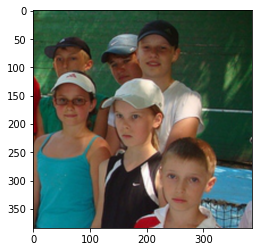

In [3]:
image = tv.io.image.read_image('data/3.jpg')
size = image.shape[1:]
image = tv.transforms.Resize(size=[int(s * image_scale) for s in size]).forward(image)
plt.imshow(image.numpy().transpose([1, 2, 0]))

In [4]:
scores, boxes = detector(image[None])

C:\Users\twytw\AppData\Local\Programs\Python\Python38\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [5]:
filter = DetectResult(FaceDetectionFullRange.NUM_CLASSES, FaceDetectionFullRange.NUM_COORDS, 0.5, 0.3)
scores, boxes = filter(scores, boxes)

scores = scores.cpu().detach().numpy()
boxes = boxes.cpu().detach().numpy() * 192
print(scores)
print(boxes)

[[0.8547403 ]
 [0.81657946]
 [0.7993322 ]
 [0.7833806 ]
 [0.6311476 ]
 [0.5824585 ]]
[[132.2615   154.94676   42.054153  42.0522   122.80223  147.71542
  141.68312  150.40257  130.23814  160.14288  129.59608  167.20813
  114.54572  149.27579  151.80374  154.32573 ]
 [ 33.6482    86.20682   32.336437  32.334995  26.81292   80.33051
   40.182144  80.55825   32.64933   87.76663   32.86377   94.095604
   20.646732  83.33682   48.386894  83.80582 ]
 [106.85608   42.074425  33.368816  33.367577  99.757614  34.34957
  113.82692   35.488667 105.659195  40.87677  105.41128   48.678314
   93.165955  39.222378 122.10626   41.546906]
 [ 29.882423  48.31877   26.003408  26.001747  24.211784  45.00811
   35.54585   44.41453   29.06437   51.504467  29.773403  55.812378
   20.261723  46.65972   43.44451   45.493744]
 [ 83.856834 101.85711   35.55001   35.547997  77.168976  94.8654
   89.953735  95.289764  79.779854 102.7897    80.67628  110.123085
   75.031235  97.84013  101.80281   99.57768 ]
 [ 76.9

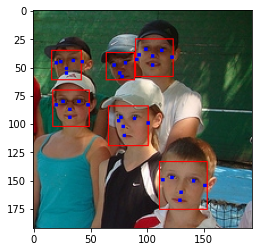

In [6]:
cv_img = cv.imread('data/3.jpg')
for box in boxes:
    box, points = box[:4].reshape([2, 2]), box[4:].reshape([-1, 2])
    lt = box[0] - box[1] / 2
    rb = box[0] + box[1] / 2
    cv_img = cv.rectangle(cv_img, lt.astype('int32'), rb.astype('int32'), color=(0, 0, 255), thickness=1)
    for pts in points:
        cv_img = cv.drawMarker(cv_img, pts.astype('int32'), (255, 0, 0), markerType=2, markerSize=3)
# convert BGR to RGB
plt.figure()
plt.imshow(cv_img[..., ::-1])
plt.show()